Data Scientist Workshop - ex.5.3 - Adam Trentowski, 162602


In [1]:
import pandas as pd
from pandas.plotting import parallel_coordinates
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import andrews_curves
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
dataset = pd.read_csv('D:/Projekty/DataScientistWorkshop/lab_05/files/JezPrzymClass.csv')

In [3]:
dataset.shape

(59, 6)

In [4]:
dataset.head()

,Id,Keratella_cochlearis_tecta,Polyarthra_vulgaris,Pompholyx_sulcata,Mesocyclops_leuckarti,Lake_class
0,1,0.03,0.0,0.0,0.00,Oligohaline
1,2,0.08,0.0,0.0,0.09,Oligohaline
2,3,0.06,0.0,0.0,0.08,Oligohaline
3,4,0.04,0.0,0.0,0.14,Oligohaline
4,5,0.02,0.0,0.0,0.00,Oligohaline


In [5]:
dataset.describe()

,Id,Keratella_cochlearis_tecta,Polyarthra_vulgaris,Pompholyx_sulcata,Mesocyclops_leuckarti
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,30.000000,0.059831,0.000508,0.002203,0.066271
std,17.175564,0.069220,0.002216,0.007208,0.119624
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,15.500000,0.020000,0.000000,0.000000,0.000000
50%,30.000000,0.040000,0.000000,0.000000,0.000000
75%,44.500000,0.070000,0.000000,0.000000,0.090000
max,59.000000,0.320000,0.010000,0.030000,0.580000


Number of instances (rows) that belong to each class:

In [6]:
dataset.groupby('Lake_class').size()

Lake_class
Freshwater             29
Freshwater-isolated     5
Mesohaline             10
Oligohaline            15
dtype: int64

In [7]:
feature_columns = ['Keratella_cochlearis_tecta', 'Polyarthra_vulgaris', 'Pompholyx_sulcata', 'Mesocyclops_leuckarti']
X = dataset[feature_columns].values  # or X = dataset.iloc[:, 1:5].values
y = dataset['Lake_class'].values  # or y = dataset.iloc[:, 5].values

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)

Parallel Coordinates Plot

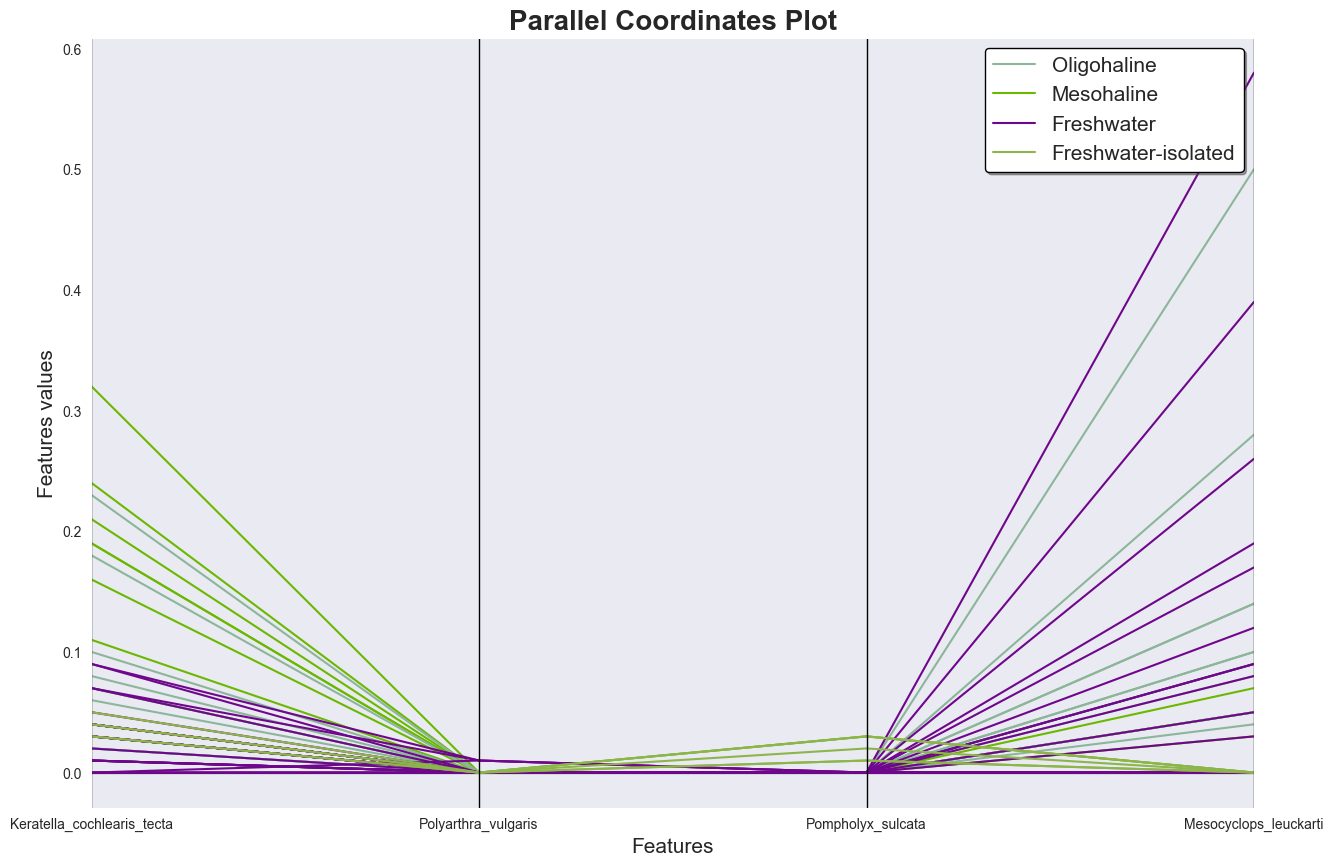

In [9]:
plt.figure(figsize=(15, 10))
parallel_coordinates(dataset.drop('Id', axis=1), 'Lake_class')

plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

Andrews Curves Plot

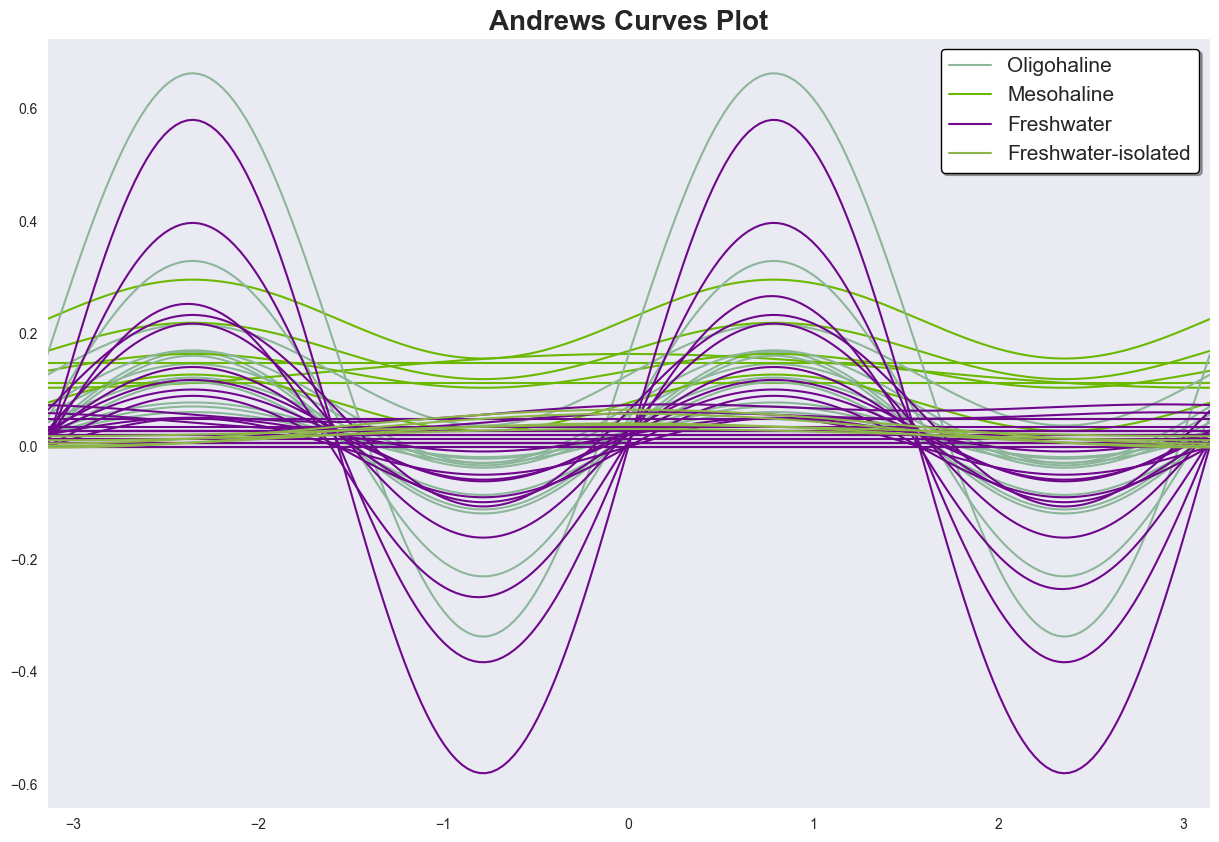

In [10]:
plt.figure(figsize=(15, 10))
andrews_curves(dataset.drop('Id', axis=1), 'Lake_class')

plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

Pairplot

<Figure size 640x480 with 0 Axes>

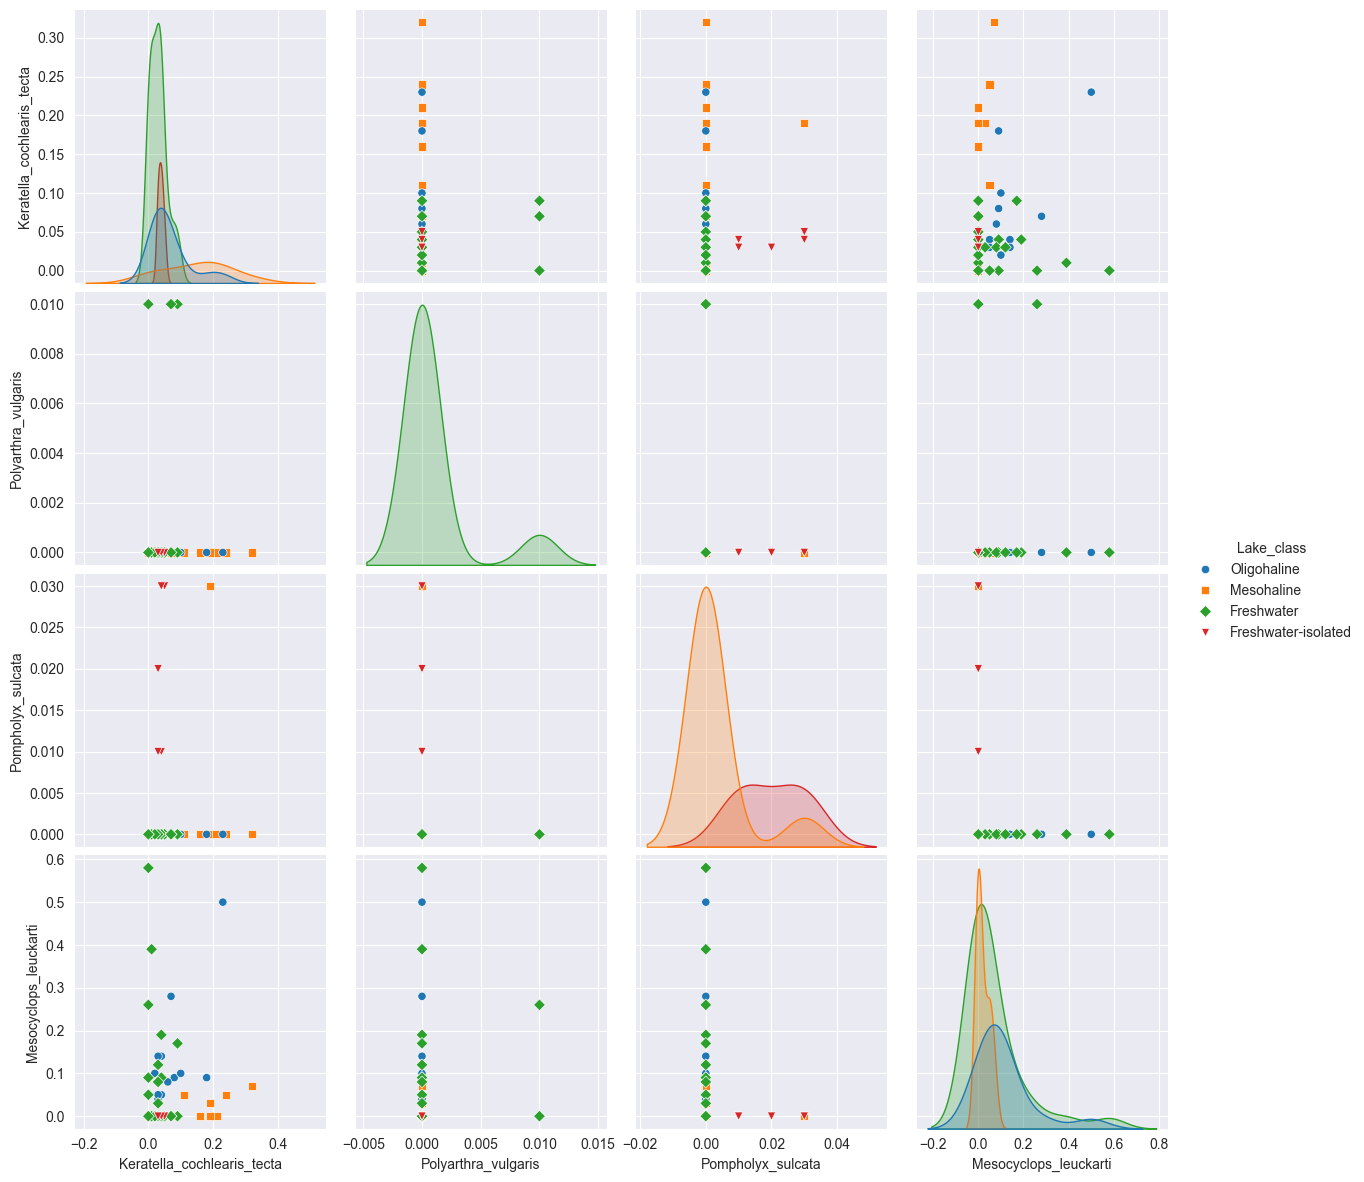

In [11]:
plt.figure()
sns.pairplot(dataset.drop('Id', axis=1), hue='Lake_class', height=3, markers=['o', 's', 'D', 'v'])
plt.show()

Boxplot

<Figure size 640x480 with 0 Axes>

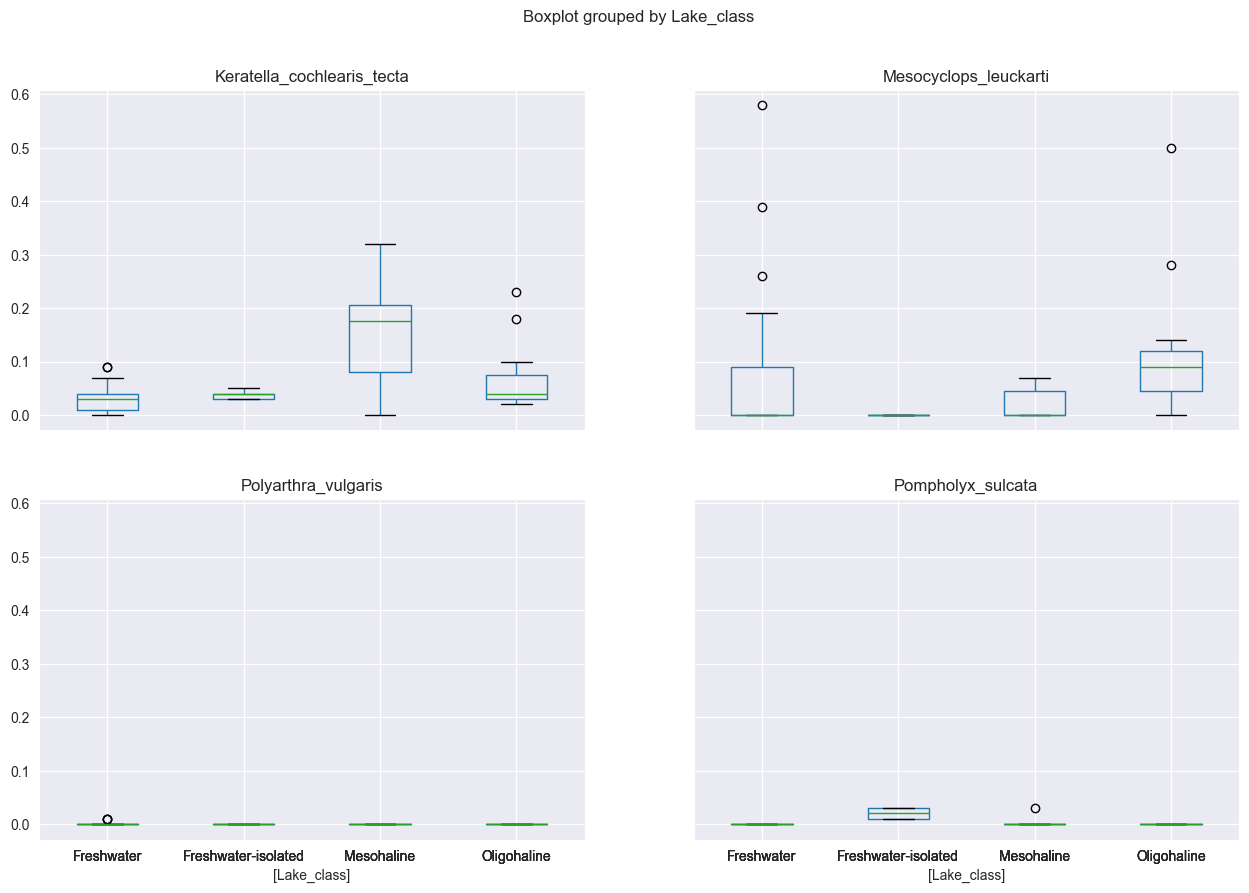

In [12]:
plt.figure()
dataset.drop('Id', axis=1).boxplot(by='Lake_class', figsize=(15, 10))
plt.show()

3D Visualization

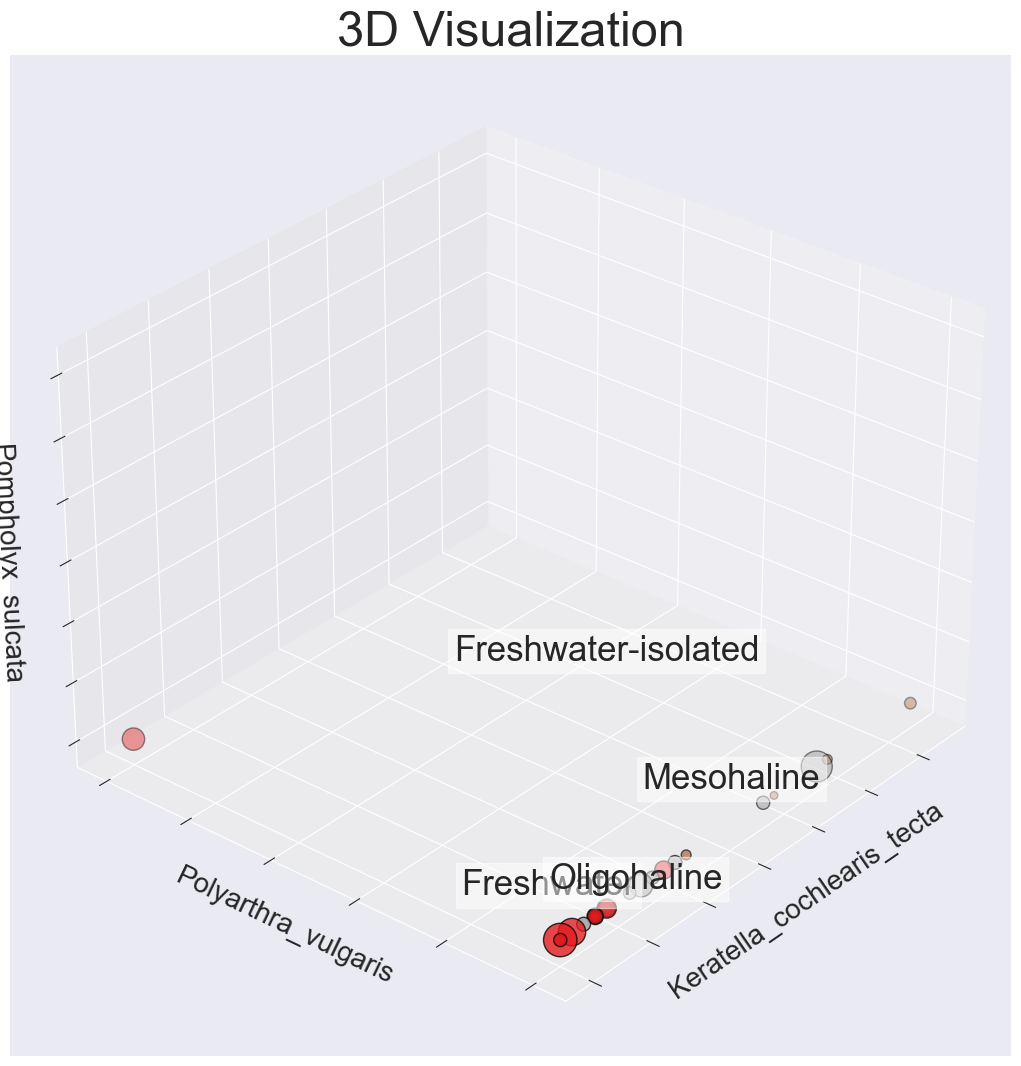

In [28]:
fig = plt.figure(1, figsize=(18, 13))

ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=220)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=X[:, 3] * 1000)

for name, label in [('Freshwater', 0), ('Freshwater-isolated', 1), ('Mesohaline', 2), ('Oligohaline', 3)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=0.5, facecolor='w', edgecolor='w'),
              size=25)


ax.set_title('3D Visualization', fontsize=35)

ax.set_xlabel('Keratella_cochlearis_tecta', fontsize=20)
ax.xaxis.set_ticklabels([])

ax.set_ylabel('Polyarthra_vulgaris', fontsize=20)
ax.yaxis.set_ticklabels([])

ax.set_zlabel('Pompholyx_sulcata', fontsize=20)
ax.zaxis.set_ticklabels([])

plt.show()

Fitting KNN Classifier

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3, 0, 4],
       [1, 1, 0],
       [1, 0, 2]], dtype=int64)

In [31]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy of model is equal {round(accuracy, 2)} %.')

Accuracy of model is equal 50.0 %.


Searching for best k value

In [60]:
# list of k for KNN
k_list = list(range(1, 30, 2))  # due to the size of the data, there is no point in looking for n > 30

# list of cv scores
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

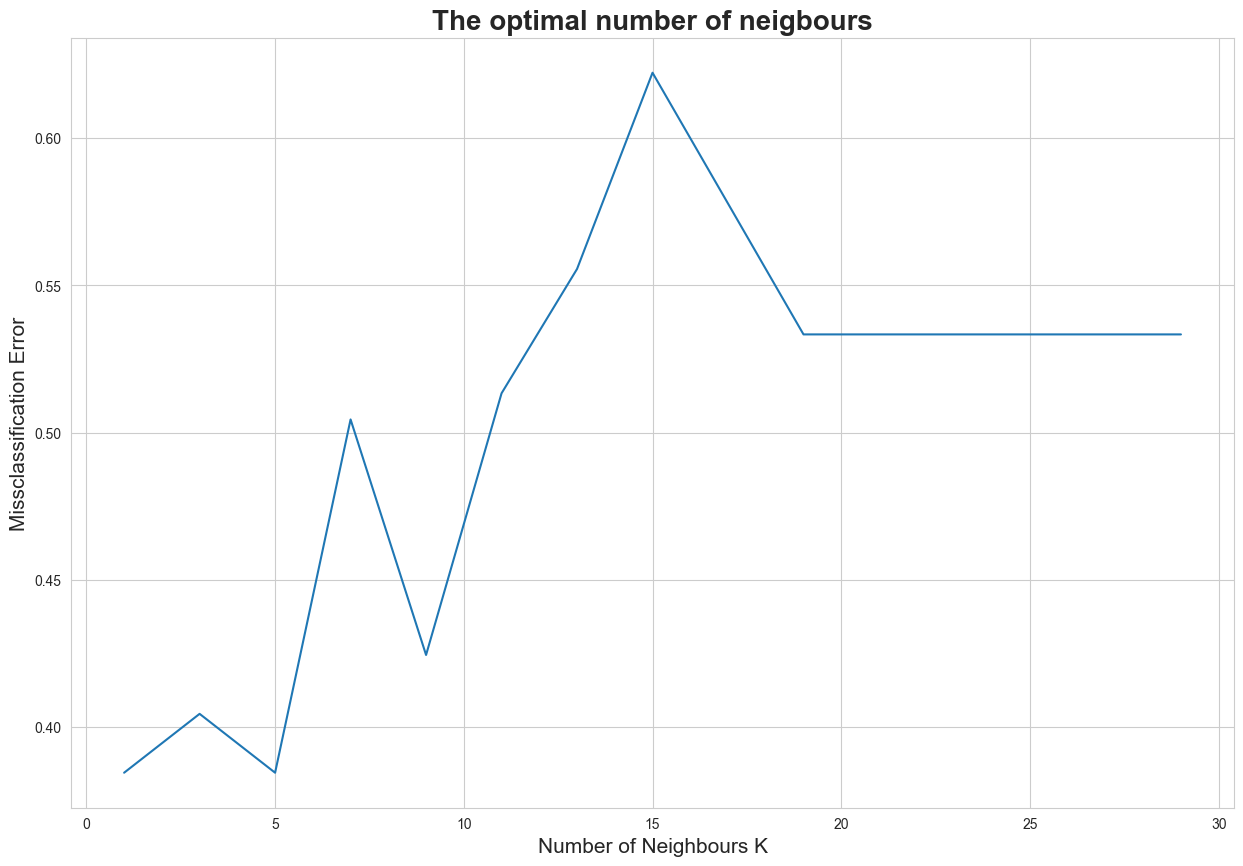

In [61]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(15, 10))

plt.title('The optimal number of neigbours', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbours K', fontsize=15)
plt.ylabel('Missclassification Error', fontsize=15)
sns.set_style('whitegrid')
plt.plot(k_list, MSE)

plt.show()

Finding best k

In [63]:
min_MSE = min(MSE)
min_indices = [i for i, mse in enumerate(MSE) if mse == min_MSE]
min_k_values = [k_list[i] for i in min_indices]

print(f"The optimal numbers of neighbours are {min_k_values} with MSE of {min_MSE}.")

The optimal numbers of neighbours are [1, 5] with MSE of 0.3844444444444445.
